# PROJECT 2 Data Transformation

The goal of this assignment is to give you practice in preparing different datasets for downstream
analysis work.
Your task is to:
(1) Choose any three of the “wide” datasets identified in the Week 5 Discussion items. (You may
use your own dataset; please don’t use my Sample Post dataset, since that was used in your
Week 6 assignment!) For each of the three chosen datasets:
• Create a .CSV file (or optionally, a MySQL database!) that includes all of the information
included in the dataset. You’re encouraged to use a “wide” structure similar to how the
information appears in the discussion item, so that you can practice tidying and
transformations as described below.
• Read the information from your .CSV file into R, and use tidyr and dplyr as needed to tidy
and transform your data. [Most of your grade will be based on this step!]
• Perform the analysis requested in the discussion item.
• Your code should be in an R Markdown file, posted to rpubs.com, and should include
narrative descriptions of your data cleanup work, analysis, and conclusions.

In [6]:
install.packages("gapminder")
install.packages("reshape2")
install.packages("ggpubr")
install.packages("usmap")
install.packages("kableExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Deriv’, ‘microbenchmark’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘s2’, ‘units’, ‘sf’, ‘usmapdata’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘svglite’




In [7]:
library(tidyverse)
library(dplyr)
library(tidyr)
library(ggplot2)
library(gapminder)
library(reshape2)
library(ggpubr)
library(usmap)
library(lubridate)
library(kableExtra)


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



Attaching package: ‘kableExtra’


The following object is masked from ‘package:dplyr’:

    group_rows




### DATASET 1

# Loading Data from Github
This data was found on Kaggle.com

In [14]:
candy_df <- read.csv('https://raw.githubusercontent.com/tenzinda97/project2/refs/heads/main/Cdata.csv', stringsAsFactors = FALSE)

head(candy_df)

,Internal.ID,Q1..GOING.OUT.,Q2..GENDER,Q3..AGE,Q4..COUNTRY,Q5..STATE..PROVINCE..COUNTY..ETC,Q6...100.Grand.Bar,Q6...Anonymous.brown.globs.that.come.in.black.and.orange.wrappers..a.k.a..Mary.Janes.,Q6...Any.full.sized.candy.bar,Q6...Black.Jacks,⋯,Q8..DESPAIR.OTHER,Q9..OTHER.COMMENTS,Q10..DRESS,X,Q11..DAY,Q12..MEDIA..Daily.Dish.,Q12..MEDIA..Science.,Q12..MEDIA..ESPN.,Q12..MEDIA..Yahoo.,Click.Coordinates..x..y.
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>
1,90258773,,,,,,,,,,⋯,,,,,,NA,NA,NA,NA,
2,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,⋯,,Bottom line is Twix is really the only candy worth eating.,White and gold,,Sunday,NA,1,NA,NA,"(84, 25)"
3,90272829,,Male,49,USA,Virginia,,,,,⋯,,,,,,NA,NA,NA,NA,
4,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,⋯,,Raisins can go to hell,White and gold,,Sunday,NA,1,NA,NA,"(75, 23)"
5,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,⋯,,,White and gold,,Friday,NA,1,NA,NA,"(70, 10)"
6,90272852,No,Male,,,,JOY,DESPAIR,JOY,,⋯,,,,,,NA,1,NA,NA,"(75, 23)"


In [9]:
### Cleaning the Data

In [15]:
candy1 <- candy_df %>% select(starts_with('Q2'), starts_with('Q6')) %>%
  rename(gender = Q2..GENDER) %>%
  gather('candy_name','preference',2:50) %>%
  mutate(candy_name= str_replace(candy_name, 'Q6\\.{3}(.+)','\\1'),
         preference = str_trim(preference, side = 'both')) %>%
  filter(!preference == '' & (gender == 'Male' | gender == 'Female')) %>%
  group_by(gender,candy_name,preference) %>%
  tally() %>%
  spread(preference,n)
candy1

gender,candy_name,DESPAIR,JOY,MEH
<chr>,<chr>,<int>,<int>,<int>
Female,100.Grand.Bar,39,265,279
Female,Anonymous.brown.globs.that.come.in.black.and.orange.wrappers..a.k.a..Mary.Janes.,369,61,161
Female,Any.full.sized.candy.bar,5,542,66
Female,Black.Jacks,294,20,186
Female,Bonkers..the.board.game.,164,72,241
Female,Bonkers..the.candy.,174,34,278
Female,Bottle.Caps,207,147,218
Female,Box.o.Raisins,416,43,153
Female,Broken.glow.stick,554,5,46


### Creating Visuals and Analyzing Data
Viewing the top five candies that are "meh" to both guys and girls.

In [16]:
plot1=ggplot(arrange(filter(candy1, gender == 'Female'),desc(MEH))[1:5,], aes(x=reorder(candy_name, MEH), y = MEH, fill = MEH))+
  geom_bar(stat = 'identity')+
  coord_flip()+
  geom_text(aes(label=MEH),vjust=0.5, hjust=1.00, position = position_dodge(width = 1), color="pink", size = 5)+
  xlab("Candy Name")+ggtitle("Top Five Candies with 'MEH' by Girls")+
  scale_fill_gradient(low = 'palevioletred4', high = 'palevioletred')

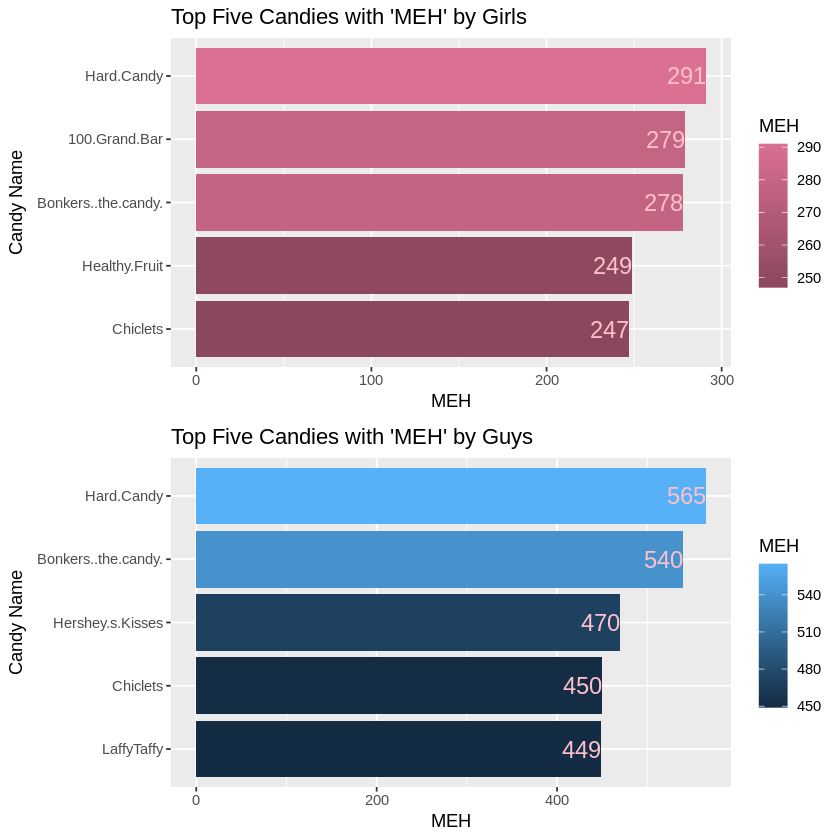

In [17]:
plot2=ggplot(arrange(filter(candy1, gender == 'Male'),desc(MEH))[1:5,], aes(x=reorder(candy_name, MEH), y = MEH, fill = MEH))+
  geom_bar(stat = 'identity')+
  coord_flip()+
  geom_text(aes(label=MEH),vjust=0.5, hjust=1.00, position = position_dodge(width = 1), color="pink",size = 5)+
  xlab("Candy Name")+ggtitle("Top Five Candies with 'MEH' by Guys")
ggarrange(plot1,plot2,nrow=2)

# DATASET 2   
Importing Data from Github

In [22]:
Testscores_df <- read_csv('https://raw.githubusercontent.com/tenzinda97/project2/refs/heads/main/testscores.csv',
                          show_col_types = FALSE)

head(Testscores_df)

StudentID,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78


In [23]:
### Creating a dataframe
Testscores_df <- data.frame(Testscores_df)
Testscores_df %>%
head(10) %>%
  kable() %>%
  kable_styling(bootstrap_options = "striped", font_size = 12, fixed_thead = T) %>%  scroll_box(height = "300px", width = "100%")

<div style="border: 1px solid #ddd; padding: 0px; overflow-y: scroll; height:300px; overflow-x: scroll; width:100%; "><table class="table table-striped" style="font-size: 12px; margin-left: auto; margin-right: auto;">
 <thead>
  <tr>
   <th style="text-align:right;position: sticky; top:0; background-color: #FFFFFF;position: sticky; top:0; background-color: #FFFFFF;"> StudentID </th>
   <th style="text-align:left;position: sticky; top:0; background-color: #FFFFFF;position: sticky; top:0; background-color: #FFFFFF;"> Gender </th>
   <th style="text-align:left;position: sticky; top:0; background-color: #FFFFFF;position: sticky; top:0; background-color: #FFFFFF;"> EthnicGroup </th>
   <th style="text-align:left;position: sticky; top:0; background-color: #FFFFFF;position: sticky; top:0; background-color: #FFFFFF;"> ParentEduc </th>
   <th style="text-align:left;position: sticky; top:0; background-color: #FFFFFF;position: sticky; top:0; background-color: #FFFFFF;"> LunchType </th>
   <th sty

In [20]:
### Tidying the Student Test Score Results data

colnames(Testscores_df) <- c("StudentID","Gender", "EthnicGroup", "ParentEduc", "LunchType", "TestPrep", "MathScore", "ReadingScore", "WritingScore")
colnames(Testscores_df) <- c("StudentID","Gender", "EthnicGroup", "ParentEduc", "LunchType", "TestPrep", "MathScore", "ReadingScore", "WritingScore")
Testscores_df%>%
head(10) %>%
  kable() %>%
  kable_styling(bootstrap_options = "striped", font_size = 12, fixed_thead = T) %>%  scroll_box(height = "300px", width = "100%")

<div style="border: 1px solid #ddd; padding: 0px; overflow-y: scroll; height:300px; overflow-x: scroll; width:100%; "><table class="table table-striped" style="font-size: 12px; margin-left: auto; margin-right: auto;">
 <thead>
  <tr>
   <th style="text-align:right;position: sticky; top:0; background-color: #FFFFFF;position: sticky; top:0; background-color: #FFFFFF;"> StudentID </th>
   <th style="text-align:left;position: sticky; top:0; background-color: #FFFFFF;position: sticky; top:0; background-color: #FFFFFF;"> Gender </th>
   <th style="text-align:left;position: sticky; top:0; background-color: #FFFFFF;position: sticky; top:0; background-color: #FFFFFF;"> EthnicGroup </th>
   <th style="text-align:left;position: sticky; top:0; background-color: #FFFFFF;position: sticky; top:0; background-color: #FFFFFF;"> ParentEduc </th>
   <th style="text-align:left;position: sticky; top:0; background-color: #FFFFFF;position: sticky; top:0; background-color: #FFFFFF;"> LunchType </th>
   <th sty

In [21]:
# DATASET 3 - Subway Riders Annually
### Load data from github


url <- 'https://raw.githubusercontent.com/tenzinda97/project2/refs/heads/main/2022%20Subway%20Tables_ul.csv'

MTA_df <- read.csv(file = url)

na.omit(MTA_df)

str(MTA_df)

,Station..alphabetical.by.borough.,X2017,X2018,X2019,X2020,X2021,X2022,X2021.2022.Change,X,X2022.Rank
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,The Bronx,The Bronx,The Bronx,The Bronx,The Bronx,The Bronx,The Bronx,The Bronx,The Bronx,The Bronx
2,138 St-Grand Concourse,"1,036,746","944,598","1,035,878","371,408","656,866","766,610","109,744",16.70%,333
3,149 St-Grand Concourse,"4,255,015","3,972,763","3,931,908","1,815,785","1,832,521","2,026,363","193,842",10.60%,152
4,161 St-Yankee Stadium,"8,596,506","8,392,290","8,254,928","3,221,651","4,077,604","5,023,193","945,589",23.20%,37
5,167 St,"2,954,228","2,933,140","2,653,237","1,396,287","1,615,072","1,847,368","232,296",14.40%,165
6,167 St,"3,293,451","2,022,919","2,734,530","1,422,149","1,508,270","1,492,833","-15,437",-1.00%,194
7,170 St,"2,785,331","2,562,443","2,487,611","1,265,950","1,278,506","1,499,662","221,156",17.30%,191
8,170 St,"2,270,027","2,454,974","2,130,461","1,002,095","1,104,637","1,121,869","17,232",1.60%,257
9,174 St,"2,334,317","2,056,692","2,057,118","953,564","1,077,126","1,140,821","63,695",5.90%,252


'data.frame':	435 obs. of  10 variables:
 $ Station..alphabetical.by.borough.: chr  "The Bronx" "138 St-Grand Concourse" "149 St-Grand    Concourse" "161 St-Yankee    Stadium" ...
 $ X2017                            : chr  "The Bronx" "1,036,746" "4,255,015" "8,596,506" ...
 $ X2018                            : chr  "The Bronx" "944,598" "3,972,763" "8,392,290" ...
 $ X2019                            : chr  "The Bronx" "1,035,878" "3,931,908" "8,254,928" ...
 $ X2020                            : chr  "The Bronx" "371,408" "1,815,785" "3,221,651" ...
 $ X2021                            : chr  "The Bronx" "656,866" "1,832,521" "4,077,604" ...
 $ X2022                            : chr  "The Bronx" "766,610" "2,026,363" "5,023,193" ...
 $ X2021.2022.Change                : chr  "The Bronx" "109,744" "193,842" "945,589" ...
 $ X                                : chr  "The Bronx" "16.70%" "10.60%" "23.20%" ...
 $ X2022.Rank                       : chr  "The Bronx" "333" "152" "37" ...


In [24]:
### Cleaning and Tidying up the dataset

# Creating new column names
newcolumn <- c('Station', 2017, 2018, 2019, 2020, 2021, 2022, '2021 - 2022 Net Change',
                   '2021 - 2022 % Change', '2022 Rank')
colnames(MTA_df) <- newcolumn

# Finding borough rows
borough <- c('The Bronx', 'Brooklyn', 'Manhattan', 'Queens')

rowvalues <- c()

for(i in 1:length(borough)){
  rowvalues[i] <- rownames(MTA_df[which(MTA_df$'2017' == borough[i]),])
}
rowvalues

[1] "1"   "70"  "228" "350"

In [26]:
### Analyzing and creating visuals for the data

dfBronx <- MTA_df[2:69,]
dfBronx['Borough'] <- borough[1]

dfBrooklyn <- MTA_df[71:227,]
dfBrooklyn['Borough'] <- borough[2]

dfManhattan <- MTA_df[229:349,]
dfManhattan['Borough'] <- borough[3]

dfQueens <- MTA_df[351:dim(MTA_df)[1],]
dfQueens['Borough'] <- borough[4]

MTA_df2 <- rbind(dfBronx, dfBrooklyn, dfManhattan, dfQueens)

In [27]:
# Removing commas and transforming characters into integers
MTA_df2 <- MTA_df2 %>%
  mutate(x = droplevels(MTA_df2),
         '2017' = as.integer(str_remove_all(MTA_df2$'2017', ',')),
         '2018' = as.integer(str_remove_all(MTA_df2$'2018', ',')),
         '2019' = as.integer(str_remove_all(MTA_df2$'2019', ',')),
         '2020' = as.integer(str_remove_all(MTA_df2$'2020', ',')),
         '2021' = as.integer(str_remove_all(MTA_df2$'2021', ',')),
         '2022' = as.integer(str_remove_all(MTA_df2$'2022', ',')),
         '2021 - 2022 Net Change' = as.integer(str_remove_all(MTA_df2$'2021 - 2022 Net Change', ',')),
         '2021 - 2022 % Change' = as.numeric(str_remove_all(MTA_df2$'2021 - 2022 % Change', '%')),
         '2022 Rank' = as.integer(MTA_df2$'2022 Rank')) %>%
select(Borough, colnames(MTA_df2))

In [31]:
colnames2 <- c('Borough', '2017', '2018', '2019', '2020', '2021', '2022')

MTA_df3 <- MTA_df2 %>%
  select(all_of(colnames2))


In [32]:
avgMTA <- MTA_df3 %>%
  pivot_longer(!Borough, names_to = 'Year', values_to = 'Ridership') %>%
  group_by(Borough, Year) %>%
  summarize(Avg_Ridership = mean(Ridership, na.rm = TRUE), .groups = 'drop')


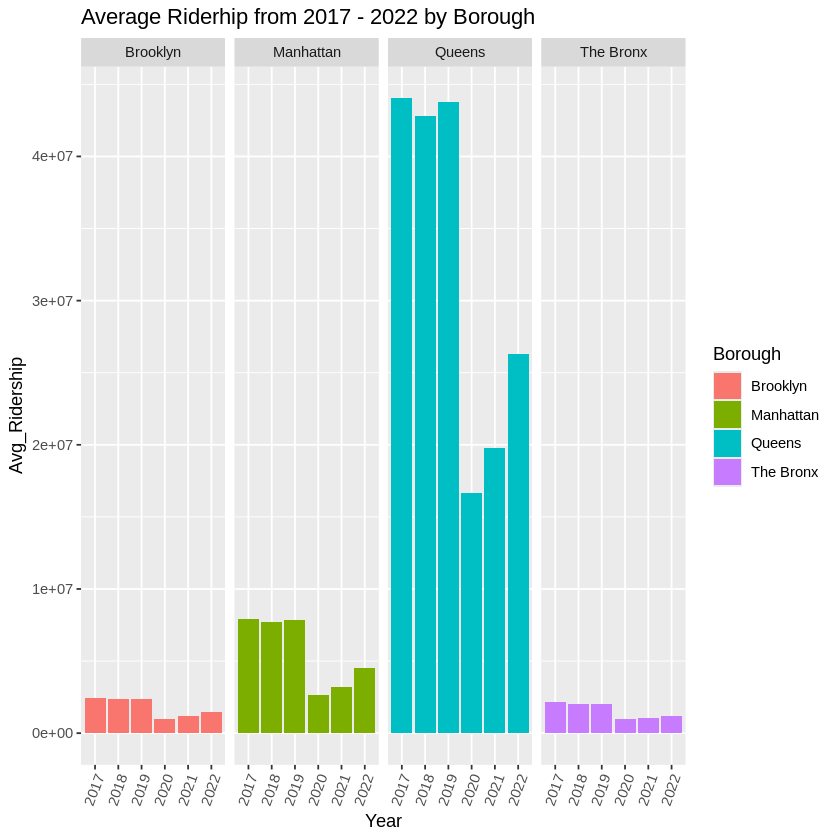

In [33]:
ggplot(data = avgMTA) +
  geom_bar(mapping = aes(x = Year, y = Avg_Ridership, fill = Borough), stat = 'identity') +
  facet_grid(~ Borough) +
  theme(axis.text.x = element_text(angle = 70, hjust = 1)) +
  labs(title = 'Average Riderhip from 2017 - 2022 by Borough')